In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [37]:
#Task a

h=1
m=1
L=1.0
n=2000
grid= np.linspace(-L/2, L/2, n)
print(grid)


[-0.5        -0.49949975 -0.4989995  ...  0.4989995   0.49949975
  0.5       ]


In [38]:
#task b

def Laplacian(n):
    """
    Computes the Laplacian operator based on number of points in grid.
    
    Parameters:
    coord1 (list): List of 3D coordinates of atom 1. 
    coord2 (list): List of 3D coordinates of atom 2.
    coord3 (list): List of 3D coordinates of atom 3.
    
    Returns:
    float: bond angle between three atoms in 3D space.
    """
    I=np.identity(n)
    sup_diag=np.diag(np.ones(n-1),1)
    sub_diag=np.diag(np.ones(n-1),-1)
    I_off=sup_diag+sub_diag
    dx=(1 / (n-1))
    laplacian=(1/(dx**2))*(-2*I+I_off)
    return laplacian

Laplacian(n)

array([[-7992002.,  3996001.,        0., ...,        0.,        0.,
               0.],
       [ 3996001., -7992002.,  3996001., ...,        0.,        0.,
               0.],
       [       0.,  3996001., -7992002., ...,        0.,        0.,
               0.],
       ...,
       [       0.,        0.,        0., ..., -7992002.,  3996001.,
               0.],
       [       0.,        0.,        0., ...,  3996001., -7992002.,
         3996001.],
       [       0.,        0.,        0., ...,        0.,  3996001.,
        -7992002.]])

In [39]:
#task c

H= (-0.5) * Laplacian(n)

In [40]:
#task d

eigenvalues, eigenvectors = np.linalg.eig(H)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


first_seven_eigenvalues = sorted_eigenvalues[:7]  
first_seven_eigenvectors = eigenvectors[:, sorted_indices[:7]]




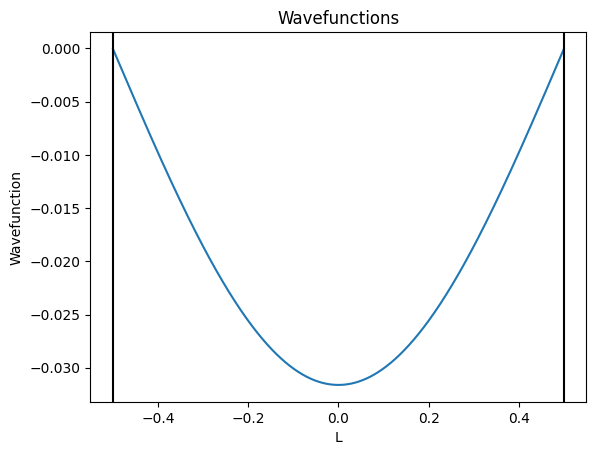

In [47]:
wavefunction = sorted_eigenvectors[:, 0]

# Step 4: Plot the first wavefunction
plt.plot(grid, wavefunction)
plt.axvline(x=L/2, color='black', linestyle='-')
plt.axvline(x=-L/2, color='black', linestyle='-')
plt.title("Wavefunctions")
plt.xlabel("L")
plt.ylabel("Wavefunction")
plt.show()

